In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
from sklearn.metrics import *
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('gene_expression.csv')
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [4]:
X = df.drop(labels='Cancer Present', axis=1)
y = df['Cancer Present']

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
print(f'X_train size: {len(X_train)}', end=', ')
print(f'X_test size: {len(X_test)}')
print(f'y_train size: {len(y_train)}', end=', ')
print(f'y_test size: {len(y_test)}')

X_train size: 2550, X_test size: 450
y_train size: 2550, y_test size: 450


In [114]:
scaler = StandardScaler()
knn = KNeighborsClassifier()
operations = [
    ('scaler', scaler),
    ('knn', knn)
]

In [115]:
pipe = Pipeline(steps=operations)

In [116]:
param_grid = {
    'knn__n_neighbors': range(1, 31)
}

In [117]:
grid_search = GridSearchCV(
                  estimator=pipe,
                  param_grid=param_grid,
                  cv=10,
                  scoring='accuracy',
                  n_jobs=-1
                )
grid_search.fit(X_train, y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

0.9333333333333333
{'knn__n_neighbors': 22}
Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=22))])


Accuracy: 0.9444444444444444
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       245
           1       0.95      0.93      0.94       205

    accuracy                           0.94       450
   macro avg       0.94      0.94      0.94       450
weighted avg       0.94      0.94      0.94       450



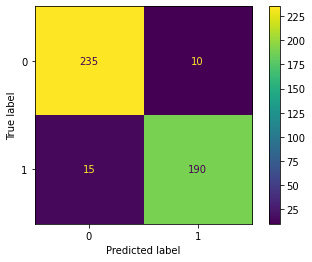

In [118]:
y_pred = grid_search.predict(X_test)
print(f'Accuracy: {accuracy_score(y_true=y_test, y_pred=y_pred)}')
print(classification_report(y_true=y_test, y_pred=y_pred))
plot_confusion_matrix(
    estimator=grid_search,
    X=X_test,
    y_true=y_test
);

In [120]:
df['Predicted'] = y_hat
missed = df[df['Cancer Present'] != df['Predicted']].index
df.iloc[missed]

,Gene One,Gene Two,Cancer Present,Predicted
7,6.3,4.9,1,0
20,6.6,3.7,0,1
34,5.0,5.3,0,1
38,5.0,5.3,0,1
45,4.8,6.5,1,0
...,...,...,...,...
2907,5.0,5.6,0,1
2935,3.4,4.8,1,0
2958,3.9,7.3,1,0
2975,5.8,4.8,0,1
